In [2]:
#data preprocessing
import pandas as pd
#Math operations
#pip install numpy==1.15.0
#math operations
import numpy as np

#machine learning
#import Deep learning Libraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random
from sklearn import metrics
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint

from numpy import loadtxt
from keras.models import load_model

from sklearn.metrics import confusion_matrix

In [2]:
PARA_DIR = "cell_images/cell_images/Parasitized/"
UNIF_DIR =  "cell_images/cell_images/Uninfected/"

In [3]:
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(UNIF_DIR)

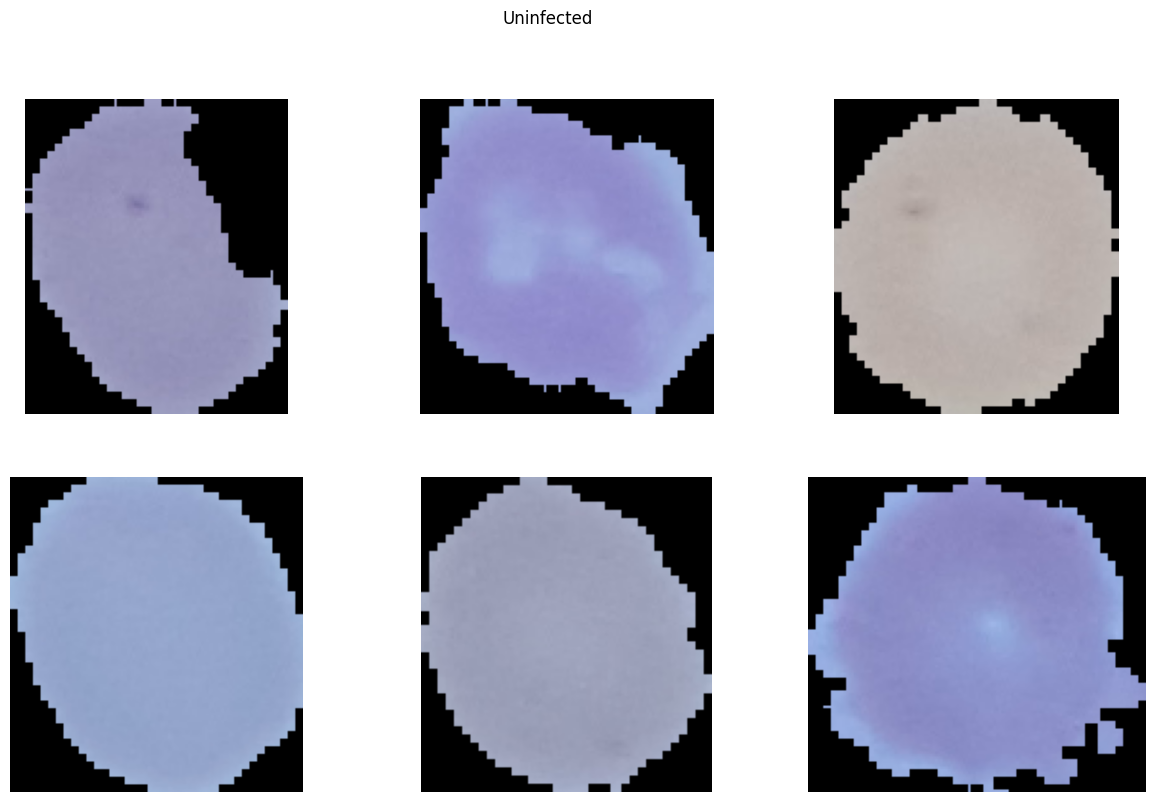

In [4]:
sample_normal = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/cell_images/Uninfected/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Uninfected')
plt.show()

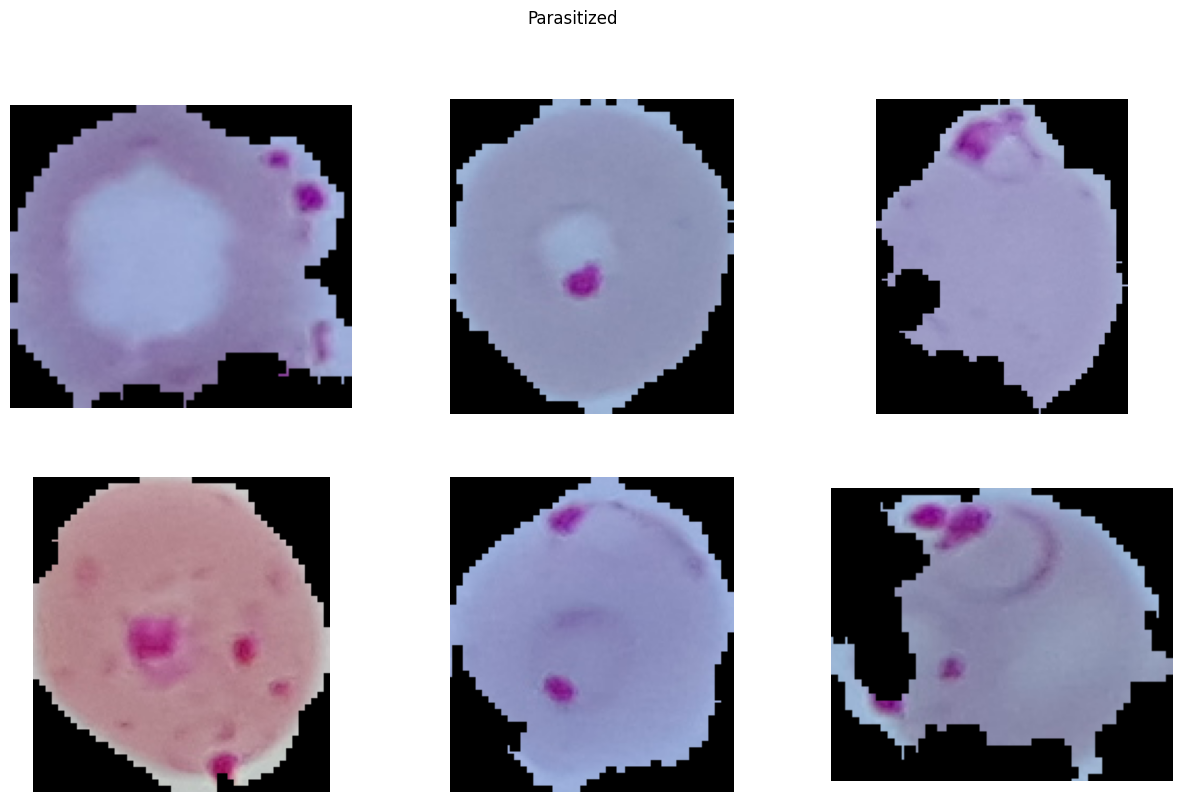

In [5]:
sample_parasite = random.sample(Pimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/cell_images/Parasitized/'+sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [6]:
data=[]
labels=[]
Parasitized=os.listdir("cell_images/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("cell_images/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("cell_images/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [7]:
Cells=np.array(data)
labels=np.array(labels)

In [8]:
np.save("Cells",Cells)
np.save("labels",labels)

In [9]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [10]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [11]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [12]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [13]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [14]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

In [17]:
#creating sequential model
# Create Model Structure
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)       

In [4]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [19]:
#Set Callback Parameters
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [20]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power
#Train model
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
776/776 [==============================] - 35s 43ms/step - loss: 0.5397 - accuracy: 0.6950 - val_loss: 0.1764 - val_accuracy: 0.9328
Epoch 2/20
776/776 [==============================] - 36s 47ms/step - loss: 0.1821 - accuracy: 0.9402 - val_loss: 0.1379 - val_accuracy: 0.9630
Epoch 3/20
776/776 [==============================] - 38s 48ms/step - loss: 0.1594 - accuracy: 0.9525 - val_loss: 0.1395 - val_accuracy: 0.9579
Epoch 4/20
776/776 [==============================] - 48s 62ms/step - loss: 0.1509 - accuracy: 0.9537 - val_loss: 0.1347 - val_accuracy: 0.9593
Epoch 5/20
776/776 [==============================] - 52s 67ms/step - loss: 0.1445 - accuracy: 0.9546 - val_loss: 0.1357 - val_accuracy: 0.9564
Epoch 6/20
776/776 [==============================] - 52s 67ms/step - loss: 0.1432 - accuracy: 0.9552 - val_loss: 0.1279 - val_accuracy: 0.9586
Epoch 7/20
776/776 [==============================] - 71s 92ms/step - loss: 0.1358 - accuracy: 0.9572 - val_loss: 0.1345 - val_accuracy:

In [21]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

In [22]:
score=model.evaluate(x_test,y_test)
print(score)

87/87 [==============================] - 1s 14ms/step - loss: 0.1152 - accuracy: 0.9601
[0.11515593528747559, 0.9600725769996643]


In [23]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 [==============================] - 1s 12ms/step - loss: 0.1152 - accuracy: 0.9601

 Test_Accuracy:- 0.9600725769996643


In [24]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

87/87 [==============================] - 2s 15ms/step


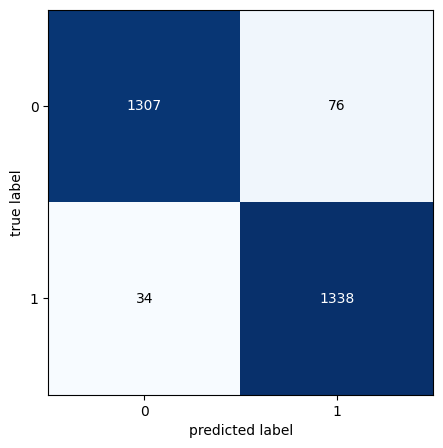

In [25]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [3]:
i=9
pred = model.predict(x_test,batch_size=1)
pred = np.argmax(pred,axis = 1)

NameError: name 'model' is not defined

In [2]:
pred[1]

NameError: name 'pred' is not defined

In [28]:
!mkdir models_app

A subdirectory or file models_app already exists.


In [29]:
model.save('models_app/my_model.h5')

In [30]:
len(model.layers)

13

In [31]:
x_test.shape[0]

2755

In [32]:
import keras
print(keras.__version__)

2.11.0


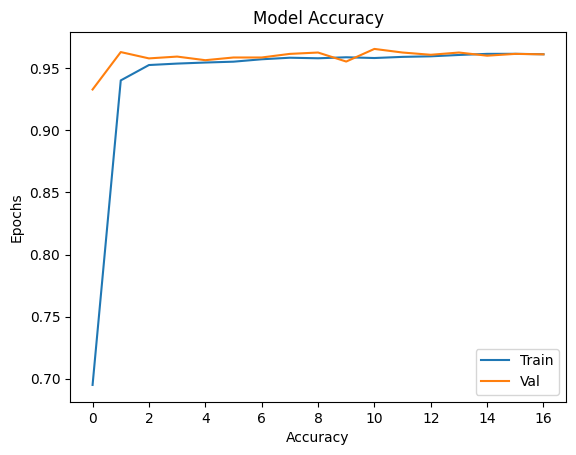

In [33]:
plt.plot(h.history['accuracy'])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
auc_keras = metrics.auc(fpr_keras, tpr_keras)
auc_keras

0.9601328290845313

In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

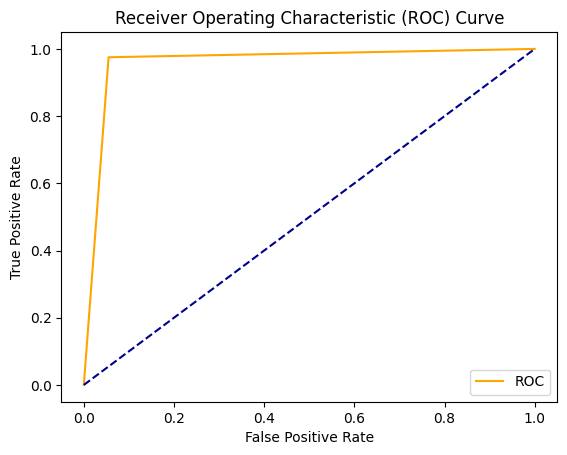

In [36]:
plot_roc_curve(fpr_keras, tpr_keras)

In [37]:
from sklearn.metrics import classification_report

In [38]:

print('{}'.format(classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1383
           1       0.95      0.98      0.96      1372

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
malaria_labels = ['Parasitized','Uninfected']

87/87 [==============================] - 1s 13ms/step


In [1]:
x_test.shape[0]

NameError: name 'x_test' is not defined

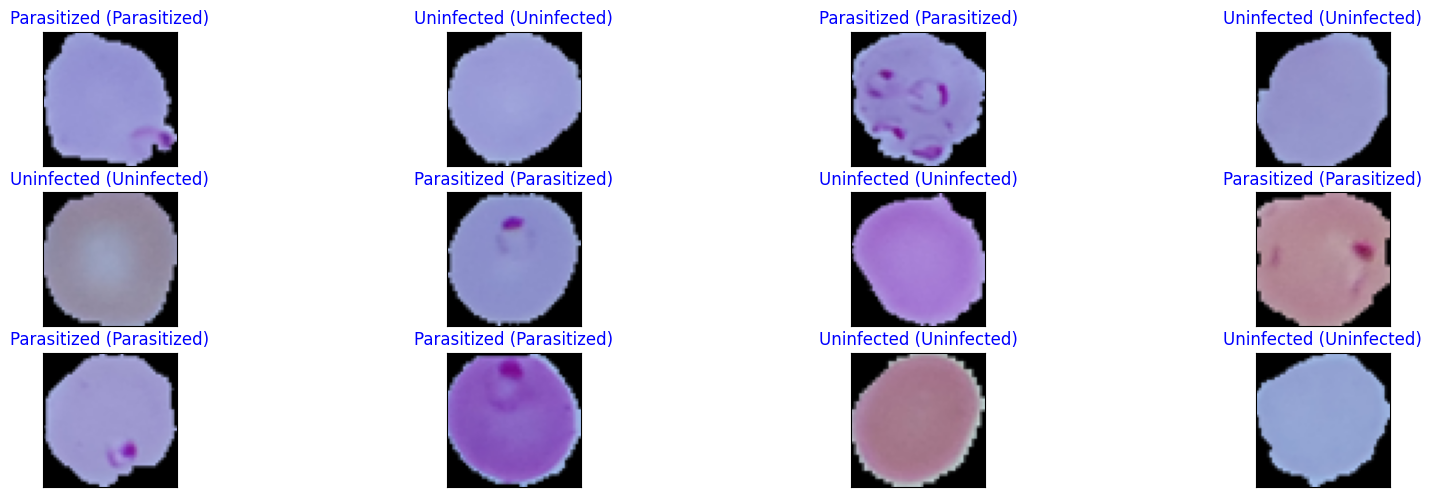

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))